In [1]:
import pandas as pd
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import torch.nn as nn
# from torch.utils.data import DataLoader
# import torch.optim as optim
# import torch
from sklearn.model_selection import train_test_split
import os
import sys
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [3]:
# Set the root directory of your repo as part of the path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
data = pd.read_csv('../Data/combined/full_lathan.csv')

/tmp/ipykernel_392964/4119657318.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/combined/full_lathan.csv')


In [5]:
# Vegas data
vegas = pd.read_csv('../Data/combined/full_vegas_data.csv')
vegas.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,YEAR
0,2012-10-30,away,Washington,Cleveland,1610612764,21200001,44.6,220.0,210.0,200.0,...,-108.17,191.0,187.0,-104.0,-110.0,84.0,-10.0,L,178.0,2012-2013
1,2012-10-30,home,Cleveland,Washington,1610612739,21200001,55.4,-260.0,-235.0,-240.0,...,-110.17,191.0,187.0,-106.0,-115.0,94.0,10.0,W,178.0,2012-2013
2,2012-10-30,away,Boston,Miami,1610612738,21200002,44.8,220.0,244.0,240.0,...,-107.33,188.0,182.0,-104.0,-110.0,107.0,-13.0,L,227.0,2012-2013
3,2012-10-30,home,Miami,Boston,1610612748,21200002,55.2,-260.0,-275.0,-260.0,...,-109.33,188.0,182.0,-105.0,-115.0,120.0,13.0,W,227.0,2012-2013
4,2012-10-30,away,Dallas,L.A. Lakers,1610612742,21200003,40.8,350.0,393.0,420.0,...,-107.50,187.0,185.0,-100.0,-110.0,99.0,8.0,W,190.0,2012-2013


In [6]:
# sort vegas by GameID then Location
vegas = vegas.sort_values(by=['GameId', 'Location'])
vegas

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,YEAR
0,2012-10-30,away,Washington,Cleveland,1610612764,21200001,44.6,220.0,210.0,200.0,...,-108.17,191.0,187.0,-104.0,-110.0,84.0,-10.0,L,178.0,2012-2013
1,2012-10-30,home,Cleveland,Washington,1610612739,21200001,55.4,-260.0,-235.0,-240.0,...,-110.17,191.0,187.0,-106.0,-115.0,94.0,10.0,W,178.0,2012-2013
2,2012-10-30,away,Boston,Miami,1610612738,21200002,44.8,220.0,244.0,240.0,...,-107.33,188.0,182.0,-104.0,-110.0,107.0,-13.0,L,227.0,2012-2013
3,2012-10-30,home,Miami,Boston,1610612748,21200002,55.2,-260.0,-275.0,-260.0,...,-109.33,188.0,182.0,-105.0,-115.0,120.0,13.0,W,227.0,2012-2013
4,2012-10-30,away,Dallas,L.A. Lakers,1610612742,21200003,40.8,350.0,393.0,420.0,...,-107.50,187.0,185.0,-100.0,-110.0,99.0,8.0,W,190.0,2012-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17203,2019-04-10,home,Denver,Minnesota,1610612743,21801228,45.2,-900.0,-794.0,-830.0,...,-107.17,218.5,218.0,-105.0,-110.0,99.0,4.0,W,194.0,2018-2019
17204,2019-04-10,away,Utah,L.A. Clippers,1610612762,21801229,61.6,199.0,249.0,275.0,...,-107.40,226.0,225.0,-102.0,-115.0,137.0,-6.0,L,280.0,2018-2019
17205,2019-04-10,home,L.A. Clippers,Utah,1610612746,21801229,38.4,-240.0,-281.0,-305.0,...,-106.60,226.0,225.0,-105.0,-110.0,143.0,6.0,W,280.0,2018-2019
17206,2019-04-10,away,Sacramento,Portland,1610612758,21801230,58.1,317.0,135.0,135.0,...,-107.67,229.0,226.5,-105.0,-111.0,131.0,-5.0,L,267.0,2018-2019


In [155]:
vegas.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spread',
       'Worst_Line_Spread', 'Best_Odds_Spread', 'Worst_Odds_Spread',
       'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU',
       'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line

In [7]:
# --- Step 1: Define shared columns (same across home/away teams) ---
shared_columns = ['Total', 'Worst_Line_OU', 'Best_Line_OU', 'Average_Line_OU']

# --- Step 2: Split into home and away teams ---
df_home = vegas[vegas['Location'] == 'home'].copy()
df_away = vegas[vegas['Location'] == 'away'].copy()

# --- Step 3: Drop shared columns from away team to avoid duplication ---
df_home = df_home.drop(columns=['Location'])  # Don't need location after naming
df_away = df_away.drop(columns=shared_columns + ['Location'])

# --- Step 4: Prefix all columns (except identifiers) ---
home_prefix = 'h_'
away_prefix = 'a_'
id_cols = ['GameId']  # Columns to merge on

df_home = df_home.rename(columns={col: home_prefix + col for col in df_home.columns if col not in id_cols})
df_away = df_away.rename(columns={col: away_prefix + col for col in df_away.columns if col not in id_cols})

# --- Step 5: Merge home and away teams on GameId ---
df_merged = pd.merge(df_home, df_away, on='GameId', how='inner')

# --- Step 6: Add shared columns (only from home, since they're the same) ---
shared_data = vegas[vegas['Location'] == 'home'][['GameId'] + shared_columns]
df_final = pd.merge(df_merged, shared_data, on='GameId', how='left')

# Optional: reorder columns to start with GameId
cols = ['GameId'] + [col for col in df_final.columns if col != 'GameId']
df_final = df_final[cols]

In [8]:
vegas = df_final

In [9]:
from src.data.preprocess import (
    combine_team_rows,
    add_home_win_column,
    split_wins_losses,
    add_playoff_indicator,
    combine_date_columns,
    remove_all_star_and_playoff_games,
    create_ml_dataset

)

In [10]:
# Creating key predictor columns
data2 = create_ml_dataset(data)

In [11]:
# Dropping GAME_DATE_EST
data2 = data2.drop(columns=['GAME_DATE_EST'])

In [12]:
data2.columns

Index(['GAME_ID', 'GAME_SEQUENCE', 'Date', 'YEAR', 'a_index', 'a_TEAM_ID',
       'a_TEAM_WINS_LOSSES', 'a_PTS', 'a_FG_PCT', 'a_FT_PCT', 'a_FG3_PCT',
       'a_AST', 'a_REB', 'a_TOV', 'h_index', 'h_TEAM_ID', 'h_TEAM_WINS_LOSSES',
       'h_PTS', 'h_FG_PCT', 'h_FT_PCT', 'h_FG3_PCT', 'h_AST', 'h_REB', 'h_TOV',
       'HOME_WIN', 'a_WINS', 'a_LOSSES', 'h_WINS', 'h_LOSSES',
       'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 'IS_PLAYOFF_GAME',
       'a_season_PTS_lag', 'a_season_AST_lag', 'a_season_REB_lag',
       'a_season_TOV_lag', 'a_season_FG_PCT_avg', 'a_season_FT_PCT_avg',
       'a_season_FG3_PCT_avg', 'a_WIN_PCT', 'a_WIN_PCT_LAST10',
       'h_season_PTS_lag', 'h_season_AST_lag', 'h_season_REB_lag',
       'h_season_TOV_lag', 'h_season_FG_PCT_avg', 'h_season_FT_PCT_avg',
       'h_season_FG3_PCT_avg', 'h_WIN_PCT', 'h_WIN_PCT_LAST10'],
      dtype='object')

In [13]:
vegas.shape, data2.shape

((8604, 115), (8610, 50))

In [14]:
combined_df = pd.merge(data2, vegas, left_on = 'GAME_ID',right_on='GameId', how='left')

In [15]:
# Drop lines from specific books. Keep only best, worst, and average lines
# --- Step 1: Define sportsbook names to remove ---
books_to_drop = ['Pinnacle', '5dimes', 'Heritage', 'Bovada', 'Betonline']

# --- Step 2: Identify columns to drop ---
columns_to_drop = [col for col in combined_df.columns if any(book in col for book in books_to_drop)]

# --- Step 3: Drop those columns from the DataFrame ---
combined_df = combined_df.drop(columns=columns_to_drop)
columns_to_drop = [col for col in combined_df.columns if any(book in col for book in books_to_drop)]
combined_df = combined_df.drop(columns=columns_to_drop)


In [16]:
combined_df

,GAME_ID,GAME_SEQUENCE,Date,YEAR,a_index,a_TEAM_ID,a_TEAM_WINS_LOSSES,a_PTS,a_FG_PCT,a_FT_PCT,...,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,a_Result,a_YEAR,Total,Worst_Line_OU,Best_Line_OU,Average_Line_OU
0,21200001,1,2012-10-30,2012-2013,1,1610612739,1-0,94,0.456,0.682,...,-104.0,-110.0,84.0,-10.0,L,2012-2013,178.0,187.0,191.0,190.33
1,21200002,2,2012-10-30,2012-2013,2,1610612738,0-1,107,0.520,0.821,...,-104.0,-110.0,107.0,-13.0,L,2012-2013,227.0,182.0,188.0,186.58
2,21200003,3,2012-10-30,2012-2013,4,1610612742,1-0,99,0.471,0.778,...,-100.0,-110.0,99.0,8.0,W,2012-2013,190.0,185.0,187.0,186.00
3,21200004,1,2012-10-31,2012-2013,6,1610612754,1-0,90,0.474,0.688,...,-109.0,-110.0,90.0,2.0,W,2012-2013,178.0,188.0,190.5,189.75
4,21200005,2,2012-10-31,2012-2013,8,1610612743,0-1,75,0.375,0.455,...,-100.0,-110.0,75.0,-9.0,L,2012-2013,159.0,196.5,202.0,197.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,21801226,7,2019-04-10,2018-2019,17217,1610612749,60-22,116,0.430,0.714,...,-105.0,-115.0,127.0,11.0,W,2018-2019,243.0,227.0,230.0,227.67
8606,21801227,8,2019-04-10,2018-2019,17218,1610612742,33-49,94,0.407,0.750,...,-105.0,-110.0,94.0,-11.0,L,2018-2019,199.0,218.0,219.0,218.42
8607,21801228,9,2019-04-10,2018-2019,17221,1610612743,54-28,99,0.448,0.647,...,-102.0,-115.0,95.0,-4.0,L,2018-2019,194.0,218.0,218.5,218.42
8608,21801229,10,2019-04-10,2018-2019,17223,1610612746,48-34,143,0.509,0.767,...,-102.0,-115.0,137.0,-6.0,L,2018-2019,280.0,225.0,226.0,225.50


In [17]:
columns_to_drop = ['a_FG_PCT', 'a_FT_PCT','a_FG3_PCT', 'a_AST', 'a_REB', 'a_TOV','GAME_ID', 'h_FG_PCT', 
                   'h_FT_PCT', 'h_FG3_PCT','h_AST', 'h_REB', 'h_TOV',
                   'GAME_SEQUENCE', 'Date', 'a_index', 'a_TEAM_ID','h_TEAM_ID', 'a_TEAM_WINS_LOSSES',
                  'h_TEAM_WINS_LOSSES', 'IS_PLAYOFF_GAME', 'h_index', 'HOME_WIN', 'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 
                  'a_WINS', 'a_LOSSES', 'h_WINS', 'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 'a_season_PTS_lag', 'a_season_AST_lag', 
                  'a_season_REB_lag', 'a_season_TOV_lag', 'h_season_PTS_lag', 'h_season_AST_lag', 'h_season_REB_lag', 'h_season_TOV_lag', 'GameId', 
                  'h_Date', 'h_Team', 'h_OppTeam', 'h_TeamId', 'h_YEAR', 'h_Result', 'h_Total', 'a_Date', 'a_Team', 'a_OppTeam', 'a_TeamId', 'a_YEAR', 'a_Result']
combined_df = combined_df.drop(columns=columns_to_drop)
combined_df

,YEAR,a_PTS,h_PTS,h_LOSSES,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,...,a_Open_Odds_OU,a_Average_Odds_OU,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,Total,Worst_Line_OU,Best_Line_OU,Average_Line_OU
0,2012-2013,94,84,0,0.465846,0.804308,0.361782,NaN,NaN,0.448566,...,-110.0,-108.17,-104.0,-110.0,84.0,-10.0,178.0,187.0,191.0,190.33
1,2012-2013,107,120,0,0.451780,0.751817,0.350976,NaN,NaN,0.471600,...,-110.0,-107.33,-104.0,-110.0,107.0,-13.0,227.0,182.0,188.0,186.58
2,2012-2013,99,91,0,0.452739,0.786101,0.344986,NaN,NaN,0.480692,...,-110.0,-107.50,-100.0,-110.0,99.0,8.0,190.0,185.0,187.0,186.00
3,2012-2013,90,88,0,0.456184,0.779842,0.359789,NaN,NaN,0.454478,...,-110.0,-109.83,-109.0,-110.0,90.0,2.0,178.0,188.0,190.5,189.75
4,2012-2013,75,84,0,0.446300,0.740671,0.340429,NaN,NaN,0.477140,...,-110.0,-108.33,-100.0,-110.0,75.0,-9.0,159.0,196.5,202.0,197.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2018-2019,116,127,33,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,...,-110.0,-108.83,-105.0,-115.0,127.0,11.0,243.0,227.0,230.0,227.67
8606,2018-2019,94,105,34,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,...,-110.0,-105.83,-105.0,-110.0,94.0,-11.0,199.0,218.0,219.0,218.42
8607,2018-2019,99,95,45,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,...,-110.0,-107.83,-102.0,-115.0,95.0,-4.0,194.0,218.0,218.5,218.42
8608,2018-2019,143,137,31,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,...,NaN,-107.40,-102.0,-115.0,137.0,-6.0,280.0,225.0,226.0,225.50


In [18]:
combined_df['h_cover'] = np.where((combined_df['h_PTS'] + combined_df['h_Average_Line_Spread'] - combined_df['a_PTS']) > 0, 1, 0)
combined_df['over_cover'] = np.where(combined_df['Total'] > combined_df['Average_Line_OU'], 1, 0)
combined_df

,YEAR,a_PTS,h_PTS,h_LOSSES,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,...,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,Total,Worst_Line_OU,Best_Line_OU,Average_Line_OU,h_cover,over_cover
0,2012-2013,94,84,0,0.465846,0.804308,0.361782,NaN,NaN,0.448566,...,-104.0,-110.0,84.0,-10.0,178.0,187.0,191.0,190.33,0,0
1,2012-2013,107,120,0,0.451780,0.751817,0.350976,NaN,NaN,0.471600,...,-104.0,-110.0,107.0,-13.0,227.0,182.0,188.0,186.58,1,1
2,2012-2013,99,91,0,0.452739,0.786101,0.344986,NaN,NaN,0.480692,...,-100.0,-110.0,99.0,8.0,190.0,185.0,187.0,186.00,0,1
3,2012-2013,90,88,0,0.456184,0.779842,0.359789,NaN,NaN,0.454478,...,-109.0,-110.0,90.0,2.0,178.0,188.0,190.5,189.75,0,0
4,2012-2013,75,84,0,0.446300,0.740671,0.340429,NaN,NaN,0.477140,...,-100.0,-110.0,75.0,-9.0,159.0,196.5,202.0,197.83,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2018-2019,116,127,33,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,...,-105.0,-115.0,127.0,11.0,243.0,227.0,230.0,227.67,1,1
8606,2018-2019,94,105,34,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,...,-105.0,-110.0,94.0,-11.0,199.0,218.0,219.0,218.42,0,0
8607,2018-2019,99,95,45,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,...,-102.0,-115.0,95.0,-4.0,194.0,218.0,218.5,218.42,0,0
8608,2018-2019,143,137,31,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,...,-102.0,-115.0,137.0,-6.0,280.0,225.0,226.0,225.50,0,1


In [19]:
cols_to_drop = ['h_PTS', 'a_PTS', 'h_LOSSES', 'h_Spread', 'Total', 'a_Spread']
combined_df = combined_df.drop(columns=cols_to_drop)
combined_df

,YEAR,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,...,a_Open_Odds_OU,a_Average_Odds_OU,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,Worst_Line_OU,Best_Line_OU,Average_Line_OU,h_cover,over_cover
0,2012-2013,0.465846,0.804308,0.361782,NaN,NaN,0.448566,0.772697,0.339461,NaN,...,-110.0,-108.17,-104.0,-110.0,84.0,187.0,191.0,190.33,0,0
1,2012-2013,0.451780,0.751817,0.350976,NaN,NaN,0.471600,0.683800,0.320200,NaN,...,-110.0,-107.33,-104.0,-110.0,107.0,182.0,188.0,186.58,1,1
2,2012-2013,0.452739,0.786101,0.344986,NaN,NaN,0.480692,0.803808,0.365885,NaN,...,-110.0,-107.50,-100.0,-110.0,99.0,185.0,187.0,186.00,0,1
3,2012-2013,0.456184,0.779842,0.359789,NaN,NaN,0.454478,0.714000,0.349896,NaN,...,-110.0,-109.83,-109.0,-110.0,90.0,188.0,190.5,189.75,0,0
4,2012-2013,0.446300,0.740671,0.340429,NaN,NaN,0.477140,0.743980,0.374400,NaN,...,-110.0,-108.33,-100.0,-110.0,75.0,196.5,202.0,197.83,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2018-2019,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,0.715500,0.348742,0.592593,...,-110.0,-108.83,-105.0,-115.0,127.0,227.0,230.0,227.67,1,1
8606,2018-2019,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,0.819921,0.392302,0.580247,...,-110.0,-105.83,-105.0,-110.0,94.0,218.0,219.0,218.42,0,0
8607,2018-2019,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,0.787917,0.352389,0.444444,...,-110.0,-107.83,-102.0,-115.0,95.0,218.0,218.5,218.42,0,0
8608,2018-2019,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,0.735549,0.352423,0.617284,...,NaN,-107.40,-102.0,-115.0,137.0,225.0,226.0,225.50,0,1


In [20]:
def moneyline_to_probability(odds):
    """Convert moneyline odds to implied probability (vectorized for arrays)."""
    return np.where(
        odds < 0,
        -odds / (-odds + 100),
        100 / (odds + 100)
    )

# Convert both home and away moneyline odds to implied probabilities
home_probs = moneyline_to_probability(combined_df['h_Average_Line_ML'])
away_probs = moneyline_to_probability(combined_df['a_Average_Line_ML'])

# Normalize to remove the vig (so that home + away = 1)
total_probs = home_probs + away_probs
combined_df['h_Implied_Prob_ML'] = home_probs / total_probs

In [21]:
if combined_df['h_PercentBet_ML'].max() > 1:
    combined_df['h_PercentBet_ML'] = combined_df['h_PercentBet_ML'] / 100.0
    
eps = 1e-6
p_public = combined_df['h_PercentBet_ML'].clip(eps, 1 - eps)
p_vegas = combined_df['h_Implied_Prob_ML'].clip(eps, 1 - eps)

# Log-odds based favorability
combined_df['h_PublicFavorability'] = np.log(p_public / (1 - p_public)) - np.log(p_vegas / (1 - p_vegas))

In [22]:
combined_df['h_PublicFavorability'].mean()

1.4170858397529191

In [23]:
combined_df

,YEAR,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,...,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,Worst_Line_OU,Best_Line_OU,Average_Line_OU,h_cover,over_cover,h_Implied_Prob_ML,h_PublicFavorability
0,2012-2013,0.465846,0.804308,0.361782,NaN,NaN,0.448566,0.772697,0.339461,NaN,...,-104.0,-110.0,84.0,187.0,191.0,190.33,0,0,0.687201,-0.570218
1,2012-2013,0.451780,0.751817,0.350976,NaN,NaN,0.471600,0.683800,0.320200,NaN,...,-104.0,-110.0,107.0,182.0,188.0,186.58,1,1,0.709567,-0.684527
2,2012-2013,0.452739,0.786101,0.344986,NaN,NaN,0.480692,0.803808,0.365885,NaN,...,-100.0,-110.0,99.0,185.0,187.0,186.00,0,1,0.804325,-1.041312
3,2012-2013,0.456184,0.779842,0.359789,NaN,NaN,0.454478,0.714000,0.349896,NaN,...,-109.0,-110.0,90.0,188.0,190.5,189.75,0,0,0.552139,0.117561
4,2012-2013,0.446300,0.740671,0.340429,NaN,NaN,0.477140,0.743980,0.374400,NaN,...,-100.0,-110.0,75.0,196.5,202.0,197.83,1,0,0.459660,0.025502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2018-2019,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,0.715500,0.348742,0.592593,...,-105.0,-115.0,127.0,227.0,230.0,227.67,1,1,0.351045,0.365167
8606,2018-2019,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,0.819921,0.392302,0.580247,...,-105.0,-110.0,94.0,218.0,219.0,218.42,0,0,0.898644,-2.517345
8607,2018-2019,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,0.787917,0.352389,0.444444,...,-102.0,-115.0,95.0,218.0,218.5,218.42,0,0,0.870344,-2.096600
8608,2018-2019,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,0.735549,0.352423,0.617284,...,-102.0,-115.0,137.0,225.0,226.0,225.50,0,1,0.733028,-1.482642


In [24]:
combined_df.drop(columns=['h_Pts', 'a_Pts', 'over_cover'], inplace=True)

In [25]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch

# STEP 1: Split into train/val/test based on YEAR
train_years = ['2012-2013', '2013-2014', '2014-2015', '2015-2016']
val_years = ['2016-2017']
test_years = ['2017-2018', '2018-2019']

df_train = combined_df[combined_df['YEAR'].isin(train_years)].copy()
df_val = combined_df[combined_df['YEAR'].isin(val_years)].copy()
df_test = combined_df[combined_df['YEAR'].isin(test_years)].copy()

# CHECK: Are the splits roughly expected sizes?
print(f"Train shape: {df_train.shape}")
print(f"Val shape:   {df_val.shape}")
print(f"Test shape:  {df_test.shape}")


Train shape: (4920, 60)
Val shape:   (1230, 60)
Test shape:  (2460, 60)


In [26]:
# STEP 2: Drop YEAR, and all columns with 'OU' (except average), and lines/odds
columns_to_drop = ['YEAR']
columns_to_drop += [col for col in combined_df.columns if 'OU' in col and col not in ['h_Average_Line_OU', 'a_Average_Odds_OU']]
columns_to_drop += [col for col in combined_df.columns if ('Line' in col or 'Odds' in col) and col not in ['h_Average_Line_OU', 'a_Average_Odds_OU']]
columns_to_drop = list(set(columns_to_drop))  # remove duplicates

df_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_val.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# CHECK: Remaining columns
print("Remaining columns:", df_train.columns.tolist())


Remaining columns: ['a_season_FG_PCT_avg', 'a_season_FT_PCT_avg', 'a_season_FG3_PCT_avg', 'a_WIN_PCT', 'a_WIN_PCT_LAST10', 'h_season_FG_PCT_avg', 'h_season_FT_PCT_avg', 'h_season_FG3_PCT_avg', 'h_WIN_PCT', 'h_WIN_PCT_LAST10', 'h_PercentBet_ML', 'h_PercentBet_Spread', 'h_Average_Line_OU', 'a_PercentBet_ML', 'a_PercentBet_Spread', 'a_Average_Odds_OU', 'h_cover', 'h_Implied_Prob_ML', 'h_PublicFavorability']


In [27]:
# STEP 3: Drop NaNs
df_train.dropna(inplace=True)
df_val.dropna(inplace=True)
df_test.dropna(inplace=True)

# Separate target from predictors
target_col = 'h_cover'
X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col].astype(int)

X_val = df_val.drop(columns=[target_col])
y_val = df_val[target_col].astype(int)

X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col].astype(int)

# CHECK: Ensure no missing values or object columns remain
print("Any NaNs in train?", X_train.isna().any().any())
print("Object cols in train:", X_train.select_dtypes(include='object').columns.tolist())


Any NaNs in train? False
Object cols in train: []


In [42]:
X_train

,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,h_WIN_PCT_LAST10,h_PercentBet_ML,h_PercentBet_Spread,h_Average_Line_OU,a_PercentBet_ML,a_PercentBet_Spread,a_Average_Odds_OU,h_Implied_Prob_ML,h_PublicFavorability
17,0.456000,0.682000,0.350000,1.000000,1.0,0.489000,0.867167,0.401333,1.000000,1.0,0.347,39.0,184.00,65.3,61.0,-108.33,0.429475,-0.348258
19,0.438000,0.913000,0.235000,0.000000,0.0,0.427000,0.738000,0.429000,1.000000,1.0,0.494,60.0,190.75,50.6,40.0,-109.33,0.405491,0.358637
20,0.460900,0.793333,0.321033,1.000000,1.0,0.377000,0.826000,0.412000,0.000000,0.0,0.693,42.5,204.42,30.7,57.5,-107.67,0.795576,-0.544688
22,0.467931,0.763103,0.339897,0.000000,0.0,0.443000,0.769000,0.375000,0.000000,0.0,1.000,50.8,195.33,0.0,49.2,-108.67,0.628914,13.287948
23,0.514000,0.690000,0.333000,1.000000,1.0,0.494000,0.387000,0.231000,0.000000,0.0,0.553,48.1,191.75,44.7,51.9,-108.33,0.471867,0.325449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.449320,0.779613,0.358440,0.370370,0.4,0.454028,0.785472,0.321167,0.345679,0.3,0.415,53.2,212.67,58.5,46.8,-109.17,0.824188,-1.888318
4916,0.489226,0.764161,0.414629,0.888889,0.9,0.440560,0.787987,0.321947,0.518519,0.1,0.296,50.0,213.08,70.4,50.0,-107.50,0.942434,-3.661947
4917,0.414627,0.782490,0.320216,0.197531,0.3,0.450458,0.745639,0.358764,0.493827,0.5,0.950,85.7,195.08,5.0,14.3,-109.50,0.393866,3.375528
4918,0.472407,0.716074,0.368926,0.654321,0.7,0.431882,0.747980,0.343490,0.271605,0.5,0.347,100.0,205.33,65.3,0.0,-109.83,0.644335,-1.226481


In [35]:
# # Final defensive conversion to ensure clean float32 arrays
# X_train_np = np.array(X_train, dtype=np.float32)
# X_val_np = np.array(X_val, dtype=np.float32)
# X_test_np = np.array(X_test, dtype=np.float32)

# # Convert labels to int64 tensors (required by TabNet internally)
# y_train = np.array(y_train).astype(np.int64)
# y_val = np.array(y_val).astype(np.int64)
# y_test = np.array(y_test).astype(np.int64)

# Scaling Predictor values
# STEP 1: Fit StandardScaler on X_train only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# STEP 2: Apply to val and test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# STEP 3: Convert to float32 NumPy arrays (for TabNet)
X_train_np = X_train_scaled.astype(np.float32)
X_val_np = X_val_scaled.astype(np.float32)
X_test_np = X_test_scaled.astype(np.float32)

# STEP 4: Convert labels to int64
y_train = np.array(y_train).astype(np.int64)
y_val = np.array(y_val).astype(np.int64)
y_test = np.array(y_test).astype(np.int64)

In [36]:
# Create and train the model
tabnet_model = TabNetClassifier(
    device_name='cuda' if torch.cuda.is_available() else 'cpu',
    seed=42,
    verbose=1
)

tabnet_model.fit(
    X_train=X_train_np,
    y_train=y_train,
    eval_set=[(X_val_np, y_val)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0
)

/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.73711 | val_accuracy: 0.58402 |  0:00:00s
epoch 1  | loss: 0.68796 | val_accuracy: 0.59308 |  0:00:00s
epoch 2  | loss: 0.66458 | val_accuracy: 0.60214 |  0:00:00s
epoch 3  | loss: 0.65341 | val_accuracy: 0.60461 |  0:00:00s
epoch 4  | loss: 0.64698 | val_accuracy: 0.62026 |  0:00:00s
epoch 5  | loss: 0.64    | val_accuracy: 0.61862 |  0:00:00s
epoch 6  | loss: 0.63893 | val_accuracy: 0.60873 |  0:00:01s
epoch 7  | loss: 0.641   | val_accuracy: 0.60956 |  0:00:01s
epoch 8  | loss: 0.62723 | val_accuracy: 0.6285  |  0:00:01s
epoch 9  | loss: 0.62475 | val_accuracy: 0.63097 |  0:00:01s
epoch 10 | loss: 0.62033 | val_accuracy: 0.63674 |  0:00:01s
epoch 11 | loss: 0.61889 | val_accuracy: 0.6318  |  0:00:01s
epoch 12 | loss: 0.61444 | val_accuracy: 0.63756 |  0:00:02s
epoch 13 | loss: 0.61855 | val_accuracy: 0.63921 |  0:00:02s
epoch 14 | loss: 0.61081 | val_accuracy: 0.63509 |  0:00:02s
epoch 15 | loss: 0.61269 | val_accuracy: 0.63262 |  0:00:02s
epoch 16 | loss: 0.60545

/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [40]:
# Predicting on test data
y_pred = tabnet_model.predict(X_test_np)
y_proba = tabnet_model.predict_proba(X_test_np)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

Accuracy: 0.615924092409241
ROC AUC: 0.6580990529881561
              precision    recall  f1-score   support

           0       0.61      0.80      0.70      1326
           1       0.62      0.39      0.48      1098

    accuracy                           0.62      2424
   macro avg       0.62      0.60      0.59      2424
weighted avg       0.62      0.62      0.60      2424



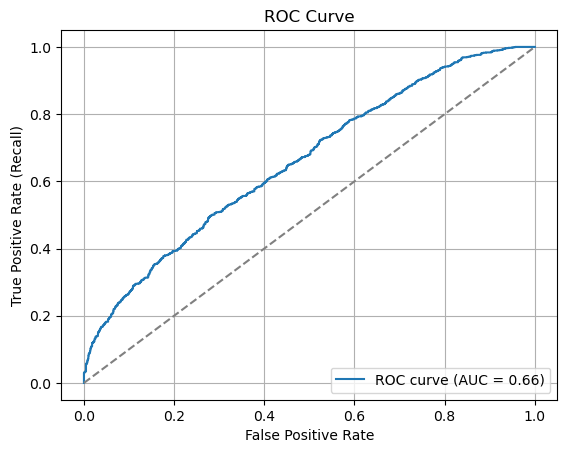

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


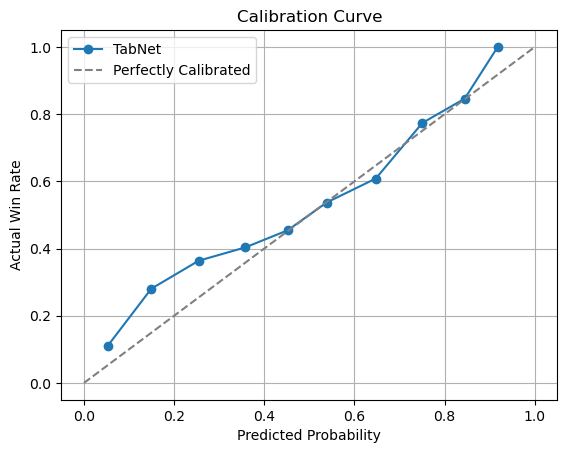

In [54]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get calibration data (e.g., 10 bins)
prob_true, prob_pred = calibration_curve(y_test, y_proba,n_bins = 10, strategy='uniform')

# Plot
plt.plot(prob_pred, prob_true, marker='o', label='TabNet')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Actual Win Rate')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()


In [29]:

# Helper: encode categorical and convert to float32
def prepare_tabnet_input(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    return df.astype(np.float32)

# Apply to all X sets
X_train_np = prepare_tabnet_input(X_train).to_numpy(dtype=np.float32)
X_val_np = prepare_tabnet_input(X_val).to_numpy(dtype=np.float32)
X_test_np = prepare_tabnet_input(X_test).to_numpy(dtype=np.float32)

# ✅ CHECK: Final dtype confirmation
print("Train dtype:", X_train_np.dtype, "| Shape:", X_train_np.shape)
print("Val dtype:", X_val_np.dtype)


Train dtype: float32 | Shape: (4844, 18)
Val dtype: float32


In [30]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import torch

# STEP 5: Fit TabNet
tabnet_model = TabNetClassifier(
    device_name='cuda' if torch.cuda.is_available() else 'cpu',
    verbose=1,
    seed=42
)

tabnet_model.fit(
    X_train=X_train_np, y_train=y_train,
    eval_set=[(X_val_np, y_val)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
)

# CHECK: Should see training logs, no dtype errors


/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.73956 | val_accuracy: 0.42339 |  0:00:00s
epoch 1  | loss: 0.69382 | val_accuracy: 0.49341 |  0:00:00s
epoch 2  | loss: 0.65647 | val_accuracy: 0.47117 |  0:00:00s
epoch 3  | loss: 0.6532  | val_accuracy: 0.4687  |  0:00:00s
epoch 4  | loss: 0.64647 | val_accuracy: 0.42257 |  0:00:00s
epoch 5  | loss: 0.6432  | val_accuracy: 0.40527 |  0:00:00s
epoch 6  | loss: 0.63804 | val_accuracy: 0.58731 |  0:00:01s
epoch 7  | loss: 0.6383  | val_accuracy: 0.60544 |  0:00:01s
epoch 8  | loss: 0.63348 | val_accuracy: 0.60873 |  0:00:01s
epoch 9  | loss: 0.63663 | val_accuracy: 0.61203 |  0:00:01s
epoch 10 | loss: 0.62982 | val_accuracy: 0.59802 |  0:00:01s
epoch 11 | loss: 0.62478 | val_accuracy: 0.59308 |  0:00:01s
epoch 12 | loss: 0.62371 | val_accuracy: 0.60297 |  0:00:02s
epoch 13 | loss: 0.62136 | val_accuracy: 0.60461 |  0:00:02s
epoch 14 | loss: 0.61365 | val_accuracy: 0.61038 |  0:00:02s
epoch 15 | loss: 0.61372 | val_accuracy: 0.60379 |  0:00:02s
epoch 16 | loss: 0.61072

/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# get rid of inverse columns 

### Setting up Data for the Model

In [ ]:
# Adding season columns (ex: Season 2012-2013 is season 1)
season_order = sorted(combined_df['YEAR_x'].unique())
season_to_index = {season: i+1 for i, season in enumerate(season_order)}
combined_df['SEASON_NUM'] = combined_df['YEAR_x'].map(season_to_index)

# Dropping rows with Missing values for now
combined_df = combined_df.dropna()

In [ ]:
# Filtering data into train (2012 - 2016), validation (2017), test seasons (2018-2019)
train_df = combined_df[combined_df['SEASON_NUM'] <= 3]    # Seasons 1-3
val_df = combined_df[combined_df['SEASON_NUM'] == 4]      # Season 4
test_df = combined_df[combined_df['SEASON_NUM'] >= 5]     # Seasons 5-6

In [66]:
combined_df.columns

Index(['GAME_ID', 'GAME_SEQUENCE', 'Date_x', 'YEAR_x', 'GAME_DATE_EST',
       'a_index_x', 'a_TEAM_ID', 'a_TEAM_WINS_LOSSES', 'a_PTS', 'a_FG_PCT',
       ...
       'h_Average_Line_OU', 'h_Average_Odds_OU', 'h_Best_Line_OU',
       'h_Worst_Line_OU', 'h_Best_Odds_OU', 'h_Worst_Odds_OU', 'h_Pts',
       'h_Spread', 'h_Result', 'h_Total'],
      dtype='object', length=166)

In [67]:
# Dropping columns that we don't need?
columns_to_drop = ['a_PTS', 'a_FG_PCT', 'a_FT_PCT','a_FG3_PCT', 'a_AST', 'a_REB', 'a_TOV','GAME_ID',
                   'h_PTS', 'h_FG_PCT', 'h_FT_PCT', 'h_FG3_PCT','h_AST', 'h_REB', 'h_TOV',
                   'GAME_SEQUENCE', 'Date_x', 'YEAR_x', 'a_index_x', 'a_index_y', 'a_TEAM_ID','h_TEAM_ID', 'a_TEAM_WINS_LOSSES',
                  'h_TEAM_WINS_LOSSES', 'IS_PLAYOFF_GAME', 'GAME_DATE_EST', 'h_index_x', 'h_index_y','SEASON_NUM', 'HOME_WIN']


# Creating train, validation, and test sets
X_train = train_df.drop(columns_to_drop, axis = 1)
y_train = train_df['HOME_WIN']

X_val = val_df.drop(columns_to_drop, axis = 1)
y_val = val_df['HOME_WIN']

X_test = test_df.drop(columns_to_drop, axis = 1)
y_test = test_df['HOME_WIN']

In [ ]:
X_train.drop(columns=['a_WINS', 'a_LOSSES', 'h_WINS', 'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 'a_season_PTS_lag', 'a_season_AST_lag', 'a_season_REB_lag', 'a_season_TOV_lag', 'h_season_PTS_lag', 'h_season_AST_lag', 'h_season_REB_lag', 'h_season_TOV_lag'], inplace=True)

,a_WINS,a_LOSSES,h_WINS,h_LOSSES,a_SEASON_GAMES_PLAYED,h_SEASON_GAMES_PLAYED,a_season_PTS_lag,a_season_AST_lag,a_season_REB_lag,a_season_TOV_lag,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_PTS_lag,h_season_AST_lag,h_season_REB_lag,h_season_TOV_lag,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,h_WIN_PCT_LAST10,a_Location,a_Team,a_OppTeam,a_TeamId,a_PercentBet_ML,a_Open_Line_ML,a_Pinnacle_ML,a_5dimes_ML,a_Heritage_ML,a_Bovada_ML,a_Betonline_ML,a_Average_Line_ML,a_Best_Line_ML,a_Worst_Line_ML,a_PercentBet_Spread,a_Open_Line_Spread,a_Open_Odds_Spread,a_Pinnacle_Line_Spread,a_Pinnacle_Odds_Spread,a_5dimes_Line_Spread,a_5dimes_Odds_Spread,a_Heritage_Line_Spread,a_Heritage_Odds_Spread,a_Bovada_Line_Spread,a_Bovada_Odds_Spread,a_Betonline_Line_Spread,a_Betonline_Odds_Spread,a_Average_Line_Spread,a_Average_Odds_Spread,a_Best_Line_Spread,a_Worst_Line_Spread,a_Best_Odds_Spread,a_Worst_Odds_Spread,a_PercentBet_OU,a_Open_Line_OU,a_Open_Odds_OU,a_Pinnacle_Line_OU,a_Pinnacle_Odds_OU,a_5dimes_Line_OU,a_5dimes_Odds_OU,a_Heritage_Line_OU,a_Heritage_Odds_OU,a_Bovada_Line_OU,a_Bovada_Odds_OU,a_Betonline_Line_OU,a_Betonline_Odds_OU,a_Average_Line_OU,a_Average_Odds_OU,a_Best_Line_OU,a_Worst_Line_OU,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,a_Result,a_Total,h_Location,h_Team,h_OppTeam,h_TeamId,h_PercentBet_ML,h_Open_Line_ML,h_Pinnacle_ML,h_5dimes_ML,h_Heritage_ML,h_Bovada_ML,h_Betonline_ML,h_Average_Line_ML,h_Best_Line_ML,h_Worst_Line_ML,h_PercentBet_Spread,h_Open_Line_Spread,h_Open_Odds_Spread,h_Pinnacle_Line_Spread,h_Pinnacle_Odds_Spread,h_5dimes_Line_Spread,h_5dimes_Odds_Spread,h_Heritage_Line_Spread,h_Heritage_Odds_Spread,h_Bovada_Line_Spread,h_Bovada_Odds_Spread,h_Betonline_Line_Spread,h_Betonline_Odds_Spread,h_Average_Line_Spread,h_Average_Odds_Spread,h_Best_Line_Spread,h_Worst_Line_Spread,h_Best_Odds_Spread,h_Worst_Odds_Spread,h_PercentBet_OU,h_Open_Line_OU,h_Open_Odds_OU,h_Pinnacle_Line_OU,h_Pinnacle_Odds_OU,h_5dimes_Line_OU,h_5dimes_Odds_OU,h_Heritage_Line_OU,h_Heritage_Odds_OU,h_Bovada_Line_OU,h_Bovada_Odds_OU,h_Betonline_Line_OU,h_Betonline_Odds_OU,h_Average_Line_OU,h_Average_Odds_OU,h_Best_Line_OU,h_Worst_Line_OU,h_Best_Odds_OU,h_Worst_Odds_OU,h_Pts,h_Spread,h_Result,h_Total
0,1,0,1,0,1,1,94,22,54,20,0.456000,0.682000,0.350000,1.000000,1.0,0,0,0,0,0.489000,0.867167,0.401333,1.000000,1.0,home,Cleveland,Chicago,1.610613e+09,34.7,125.0,120.0,130.0,125.0,130.0,125.0,126.0,130.0,120.0,39.0,2.0,-110.0,2.5,-107.0,3.0,-105.0,2.5,-105.0,3.0,-105.0,3.0,-115.0,2.67,-107.83,3.0,2.0,-105.0,-115.0,63.2,186.0,-110.0,183.5,-105.0,183.5,-105.0,183.5,-110.0,184.0,-110.0,183.5,-110.0,184.00,-108.33,186.0,183.5,-105.0,-110.0,86.0,-29.0,L,201.0,away,Chicago,Cleveland,1.610613e+09,65.3,-145.0,-133.0,-140.0,-145.0,-150.0,-145.0,-142.6,-133.0,-150.0,61.0,-2.0,-110.0,-2.5,-103.0,-3.0,-105.0,-2.5,-115.0,-3.0,-115.0,-3.0,-105.0,-2.67,-108.83,-2.0,-3.0,-103.0,-115.0,36.8,186.0,-110.0,183.5,-105.0,183.5,-105.0,183.5,-110.0,184.0,-110.0,183.5,-110.0,184.00,-108.33,186.0,183.5,-105.0,-110.0,115.0,29.0,W,201.0
1,0,1,1,0,1,1,95,26,43,13,0.438000,0.913000,0.235000,0.000000,0.0,113,24,61,14,0.427000,0.738000,0.429000,1.000000,1.0,home,New Orleans,Utah,1.610613e+09,49.4,145.0,137.0,143.0,140.0,140.0,140.0,140.0,143.0,137.0,60.0,3.5,-110.0,3.5,-110.0,3.5,-105.0,3.5,-110.0,3.5,-110.0,3.5,-110.0,3.50,-109.17,3.5,3.5,-105.0,-110.0,50.0,189.5,-110.0,191.0,-102.0,191.0,-102.0,191.0,-110.0,191.0,-110.0,191.0,-110.0,190.75,-107.33,191.0,189.5,-102.0,-110.0,88.0,2.0,W,174.0,away,Utah,New Orleans,1.610613e+09,50.6,-165.0,-152.0,-153.0,-160.0,-160.0,-160.0,-157.0,-152.0,-160.0,40.0,-3.5,-110.0,-3.5,-100.0,-3.5,-105.0,-3.5,-110.0,-3.5,-110.0,-3.5,-110.0,-3.50,-107.50,-3.5,-3.5,-100.0,-110.0,50.0,189.5,-110.0,191.0,-108.0,191.0,-108.0,191.0,-110.0,191.0,-110.0,191.0,-110.0,190.75,-109.33,191.0,189.5,-108.0,-110.0,86.0,-2.0,L,174.0
2,1,0,0,1,1,1,0,0,0,0,0.460900,0.793333,0.321033,1.000000,1.0,84,18,48,18,0

In [39]:
# Checking Nans totals for differnet columns
vegas.isna().sum().sort_values(ascending=False)

a_Bovada_ML        1685
h_Bovada_ML        1685
a_Open_Line_ML      168
h_Open_Line_ML      168
a_Betonline_ML      144
                   ... 
h_PercentBet_OU       0
h_Pts                 0
h_Spread              0
h_Result              0
h_Total               0
Length: 117, dtype: int64

### Feature Engineering:

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# Scaling the data with mean 0 and standard deviation 1

# Fit scaler on training features only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply same scaler to val/test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_test_scaled.dtype

dtype('float64')

In [44]:
# Testing TabNet Model
clf = TabNetClassifier(
    n_d=16,               # Number of decision prediction steps
    n_a=16,               # Number of attention steps (usually equal to n_d)
    n_steps=5,            # Number of steps in TabNet
    gamma=1.5,            # Relaxation factor
    lambda_sparse=1e-4,   # Sparse regularization
    optimizer_fn=torch.optim.Adam,  
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},  
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

clf.fit(
    X_train=X_train_scaled, y_train=y_train,
    eval_set=[(X_val_scaled, y_val)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,         # Early stopping
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/Users/lathangregg/Documents/MSDS/Spring25/DS6050_DL/Project/DL_project/.venv/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


RuntimeError: Could not infer dtype of numpy.float32

In [39]:
# Predicting on test data
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

NameError: name 'clf' is not defined